# Machine Learning: Basic Principles 2018
# Feature Learning

### Learning goals
In this exercise you will learn how to use __Principal Component Analysis (PCA)__ for __feature learning__. PCA allows us to compress the information contained in high-dimensional feature vectors into a small set of new features, called principal components. Based on these new features we can implement ML methods (regression or classification) with reduced computational complexity. 

<!--A second benefit of PCA (or feature learning in general), besides reducing computational complexity, is to avoid overfitting. 
Your task in this exercise is to fill in `...` under `### STUDENT TASK ###`. -->

### Exercise Contents

1. [Principal Component Analysis (PCA)](#Q1) <br>
2. [Re-visiting the regression notebook](#Q2) <br>
 2.1 [Getting Hands on the Data](#Q2) <br>
 2.2 [Using PCA for data visualization](#2d_vis) <br>
 2.3 [Combining PCA with linear regression](#PCA_before_reg)<br>

### Keywords
`Principal Component Analysis (PCA)`, `eigenvalue decomposition`, `Data visualization`, `Overfitting`.

## 1. Principal Component Analysis (PCA)
<a id="Q1"></a>
The aim of PCA is to find a compression matrix $\mathbf{W}_{PCA}\in \mathbb{R}^{d \times D}$ which steps down the dimensions of datavectors when we apply the linear operator,

\begin{equation}
    \mathbf{x}_{PCA}^{(i)}=\mathbf{W}_{PCA}\mathbf{z}^{(i)}
\end{equation}

In order to minimize the loss of information it is logical to make sure that the transformed lower dimensional vector $\mathbf{x} \in \mathbb{R}^d$ approximates the original data as well as possible. The optimal matrix that can be used to step down the data which minimizes the loss of data is a matrix consisting of the eigenvectors of the the matrix,
\begin{equation*}
    \mathbf{Q}=\frac{1}{N} \mathbf{Z}^{T} \mathbf{Z}
\end{equation*}

where, $\mathbf{Z} = {(\mathbf{z}^{(1)},...,\mathbf{z}^{(N)})}^T \in \mathbb{R}^{N \times D}$ is the data matrix which contains the original data points $\mathbf{z}$ in its rows. In particular, $\mathbf{W}_{PCA}={(\mathbf{u}^1,...,\mathbf{u}^d)}^T$ consists of $d$ orthonormal eigenvectors $\mathbf{u} \in \mathbb{R}^D$ which correspond to the $d$ largest eigenvalues of the matrix $\mathbf{Q}$.

<!--PCA amounts to determining a compression matrix $\mathbf{W}_{PCA}$ such that the new features $\mathbf{x}_{PCA}^{(i)}=\mathbf{W}_{PCA}\mathbf{z}^{(i)}$, which are called prinicpal components, allow to linearly reconstruct the original data points $\mathbf{z} \in \mathbb{R}^D$ with minimal error (see Chapter 9.1 of the course book for more details). For a given data set $\{\mathbf{z}^{(i)}\}_{i=1}^{N}$ the PCA matrix $\mathbf{W}_{PCA} \in \mathbb{R}^{d \times D}$ can be obtained via the eigenvalue decomposition of the matrix $\mathbf{Q}=(1/N) \mathbf{Z}^{T} \mathbf{Z}$, where $\mathbf{Z} = {(\mathbf{z}^{(1)},...,\mathbf{z}^{(N)})}^T \in \mathbb{R}^{N \times D}$ is the data matrix which contains the original data points $\mathbf{z}$ in its rows. In particular, $\mathbf{W}_{PCA}={(\mathbf{u}^1,...,\mathbf{u}^d)}^T$ consists of $d$ orthonormal eigenvectors $\mathbf{u}^l$ which correspond to the $d$ largest eigenvalues of the matrix $\mathbf{Q}$.
-->

For an intuitive explanation of PCA, this is an excellent StackExchange answer: https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues


#### Tasks
- You have to implement the PCA algorithm as a Python function "compute_pca_weight_matrix" which has two input arguments: the data matrix $\mathbf{Z}$ and the number $d$ of new features (principal components).
 
    - Compute the matrix $Q=(1/N) Z^{T} Z$
    - Compute eigenvectors $(\mathbf{u}^1,...,\mathbf{u}^D)$ and corresponding eigenvalues $(\lambda^1,...,\lambda^D)$ of $Q$. (see introduction notebook for a review of eigendecomposition in Python). 
    - Sort the eigenvalues in a decreasing order: $\lambda^{s_1} \geqslant \lambda^{s_2} \geqslant...\lambda^{s_D} \geqslant 0$.
    - Choose $d$ eigenvectors corresponding to $d$  largest eigenvalues to form the compression matrix $W_{PCA}=(\mathbf{u}^{s_1},...,\mathbf{u}^{s_d})^{T} \in \mathbb{R}^{d \times D}$ 
    - Return the compresssion matrix $W_{PCA}$ and the $d$ highest eigen values
    
Note: You should have some form of knowing the initial positions of the eigen values before sorting so that you can fetch their corresponding eigen vectors.

In [18]:
### STUDENT-TASK ###

import numpy as np

def compute_pca_weight_matrix(Z, d):
    #Input: the N by D data matrix Z(step 1), the number of components d
    #Output: a d by D matrix W_pca
    
    #step2: compute the matrix Q
    Q = np.matmul(np.transpose(Z), Z)
    Q = np.divide(Q, Z.shape[0])

    #step3: compute the eigenvalues and eigenvectors (see introduction notebook)
    eigvalues, eigvectors = np.linalg.eig(Q)

    #step4: Sort the eigenvectors by decreasing eigenvalues and form W_pca
    idx = eigvalues.argsort()[::-1][:d]
    eigvalues = eigvalues[idx]    
    eigvectors = eigvectors[:,idx] 
    W_pca = np.transpose(eigvectors)
    
    return W_pca.real,eigvalues.real

## 2. Using PCA to reduce the dimensions of an apple images.

In this task we are going to apply PCA to reduce create lower dimensional representation of  We are going to use the PCA function you have implemented above to reduce the dimensions of images of apples.

The following code block loads the images.

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

all_apples = np.zeros((15,50,50),dtype=np.uint8)

for i in range(1,16):
    img = Image.open('./apples/%s_b.jpg'%(str(i))).convert('L')
    all_apples[i-1] = np.array(img,dtype=np.uint8)

    

The first six images of apples are visualized here.

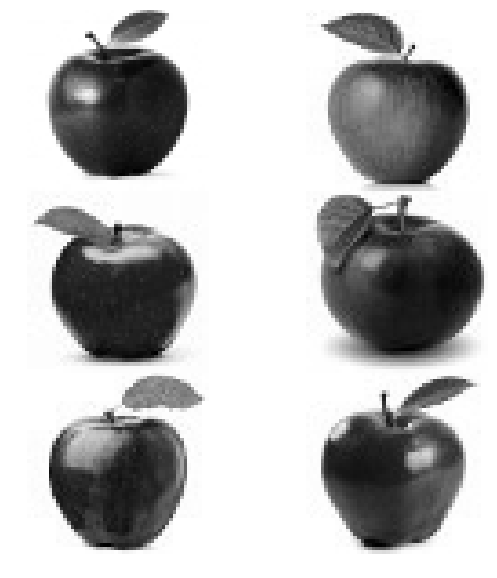

In [20]:
fig,ax = plt.subplots(3,2,figsize=(10,10),gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(3):
    for j in range(2):
        ax[i,j].imshow(all_apples[i+j*3], cmap='gray')
        ax[i,j].axis('off')

In [24]:

# Reshaping the 300x300 images as vectors
all_apples_vec = np.reshape(all_apples,(15,-1))

#Computing the first 50 eigen vectors.
PCA,eigvalues = compute_pca_weight_matrix(all_apples_vec/255.,50)

### Below is one of the problems in the notebook.  !!
If you have more principal components than data points the extra usually die out. As you can see, we have exactly 15 images in our dataset and only the first 15 eigen values have some mass. Everything else is almost 0.

In [34]:
print(eigvalues[:20])

[1.20247834e+03 2.23294077e+01 1.55174837e+01 9.46046772e+00
 5.60239487e+00 3.96867710e+00 3.08490873e+00 2.88253509e+00
 2.51662260e+00 2.05040907e+00 1.78387704e+00 1.45150798e+00
 1.31934453e+00 5.71986504e-01 4.28014405e-01 5.16642103e-14
 5.16642103e-14 3.45937784e-14 3.45937784e-14 2.44169190e-14]


Let us plot a few of the principal components learned from the images.

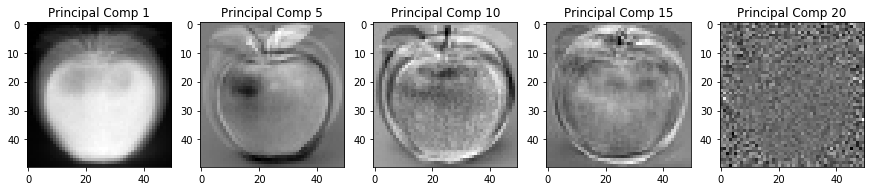

In [27]:
fig,ax = plt.subplots(1,5,figsize=(15,15))

plot_pc = [0,4,9,14,19]

for i in range(5):
    ax[i].imshow(np.reshape(PCA[plot_pc[i]]*255,(50,50)),cmap='gray')
    ax[i].set_title("Principal Comp %d"%(plot_pc[i]+1))
plt.show()
        

In [28]:
def plot_tranformed_with_comp(X,d):
    X_pca = np.matmul(PCA[:d,:],X[:,:,None])
    X_reversed = np.matmul(np.transpose(PCA[:d,:]),X_pca)[:,:,0]
    
    
    fig,ax = plt.subplots(3,2,figsize=(10,10))
    fig.suptitle("Recreated images using %d components. Contains"%(d))
    
    for i in range(3):
        for j in range(2):
            ax[i,j].imshow(np.reshape(X_reversed[i+j*3],(50,50)),cmap='gray')#imshow(all_apples[i+j*3])
            ax[i,j].axis('off')
    plt.show()

### Showing a couple of recreations from the data.

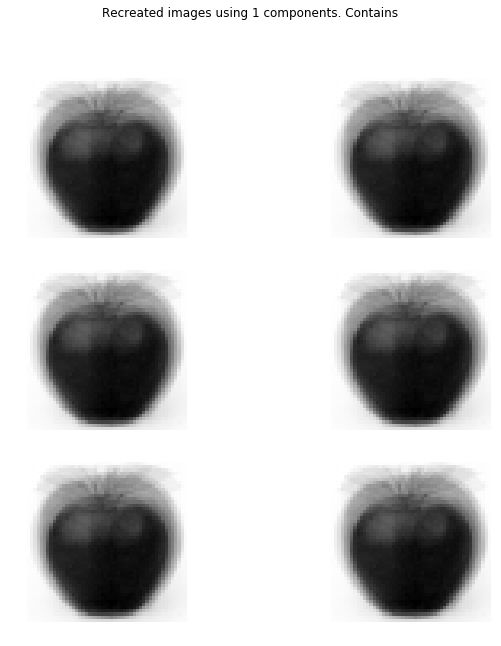

In [32]:
plot_tranformed_with_comp(all_apples_vec,1)

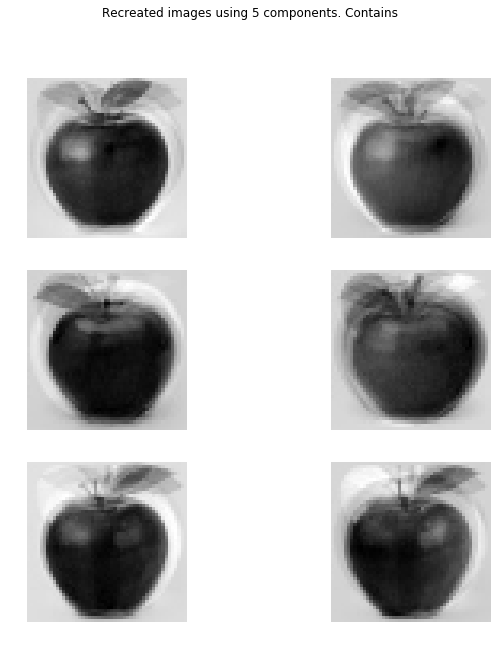

In [33]:
plot_tranformed_with_comp(all_apples_vec,5)

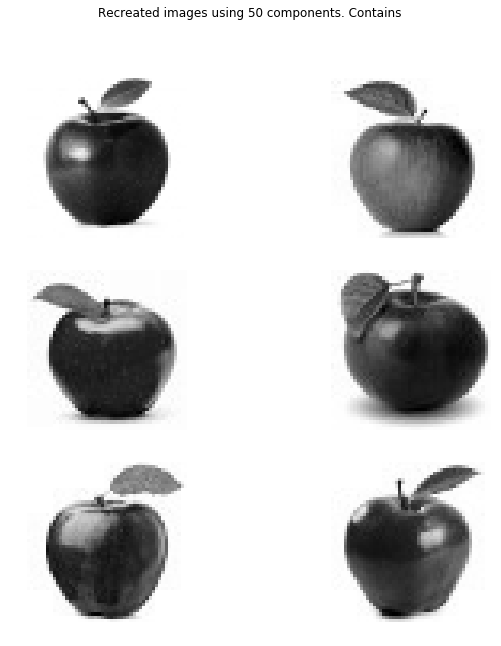

In [31]:
plot_tranformed_with_comp(all_apples_vec,50)

In [ ]:
# How does this task help students understand the importance of feature learning and PCA?